<a href="https://colab.research.google.com/github/Rohan-45-design/23BDS0276/blob/main/Digital_Assignment_23BDS0276.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
data = pd.read_csv("/content/Database.csv")
data

,rownames,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,1,NY,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,2,NY,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,NY,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,4,NY,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,5,NY,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...,...,...,...,...
133,134,CA,5,1985,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,135,CA,5,1986,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,136,CA,5,1987,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,137,CA,5,1988,497138,5.64,8.69,34.02,5.26,2366,15340.38


In [7]:
#Outlier Detection
import pandas as pd
mean_income = data['income'].mean()
print("Mean income = ",mean_income)
mean_consumption = data['consumption'].mean()
print("Mean consumption = ",mean_consumption)
def detect_outliers(data_column):
  Q1 = data_column.quantile(0.25)
  Q3 = data_column.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  return ((data_column < lower_bound) | (data_column > upper_bound))

outliers_consumption = detect_outliers(data['consumption'])
outliers_income = detect_outliers(data['income'])
print("Outliers in Consumption:")
print(data['consumption'][outliers_consumption])
print("\nOutliers in Income:")
print(data['income'][outliers_income])

Mean income =  11193.235652173913
Mean consumption =  252901.47826086957
Outliers in Consumption:
Series([], Name: consumption, dtype: int64)

Outliers in Income:
21    15946.92
22    16425.33
Name: income, dtype: float64


The mean income is approximately about 11200 and all consumption values are within the range as there are no outliers.

In [8]:
#Average consumption per state
average_consumption = data.groupby('state')['consumption'].mean()
print("States with their corresponding average consumption: ")
print(average_consumption)

#Average consumption per year
average_cons_year = data.groupby('year')['consumption'].mean()
print("Average yearly consumption: ")
print(average_cons_year)

States with their corresponding average consumption: 
state
CA    545725.000000
FL     14736.869565
MI    340548.695652
NY    336216.782609
TX    230214.521739
UT     49967.000000
Name: consumption, dtype: float64
Average yearly consumption: 
year
1967    231337.000000
1968    236078.666667
1969    250504.833333
1970    255106.333333
1971    271222.333333
1972    276386.833333
1973    267725.666667
1974    259150.000000
1975    266818.833333
1976    266315.000000
1977    248378.666667
1978    256815.166667
1979    277829.000000
1980    258016.000000
1981    244518.166667
1982    253327.166667
1983    241011.833333
1984    241369.333333
1985    245588.333333
1986    232895.833333
1987    236503.833333
1988    244999.833333
1989    254835.333333
Name: consumption, dtype: float64


The states of Florida and Utah have shockingly lower consumption in comparison to their counterpart states possibly because of cold weather conditions such that electric devices do not need to be switched on.

In [9]:
#Using binning to categorize the consumption
data["Consumption_Category"] = pd.cut(data['consumption'],bins=3,labels=['Low','Medium','High'])
#Discretizing 'price' into 3 equal-width bins
data['Price_Category'] = pd.cut(data['price'], bins=3, labels=['Low', 'Medium', 'High'])
#Discretizing 'income' into 3 equal-frequency bins
data['Income_Category'] = pd.qcut(data['income'], q=3, labels=['Low', 'Medium', 'High'])
print(data)

     rownames state  statecode  year  consumption  price  eprice  oprice  \
0           1    NY         35  1967       313656   1.42    2.98    7.40   
1           2    NY         35  1968       319282   1.38    2.91    7.77   
2           3    NY         35  1969       331326   1.37    2.84    7.96   
3           4    NY         35  1970       346533   1.40    2.87    8.33   
4           5    NY         35  1971       352085   1.50    3.07    8.80   
..        ...   ...        ...   ...          ...    ...     ...     ...   
133       134    CA          5  1985       527495   5.72    7.78   30.58   
134       135    CA          5  1986       464307   5.14    7.95   44.15   
135       136    CA          5  1987       503473   5.26    8.03   35.24   
136       137    CA          5  1988       497138   5.64    8.69   34.02   
137       138    CA          5  1989       514276   5.59    9.45   44.44   

     lprice  heating    income Consumption_Category Price_Category  \
0      1.47     6

Boxplot for income


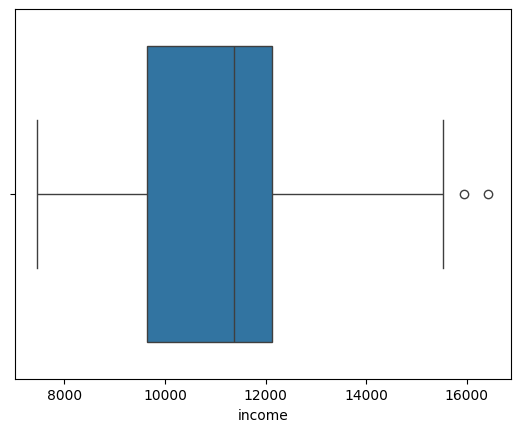

In [10]:
#Univariate analysis Part 1
print("Boxplot for income")
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="income",data=data)
plt.show()

Distribution plot for consumption


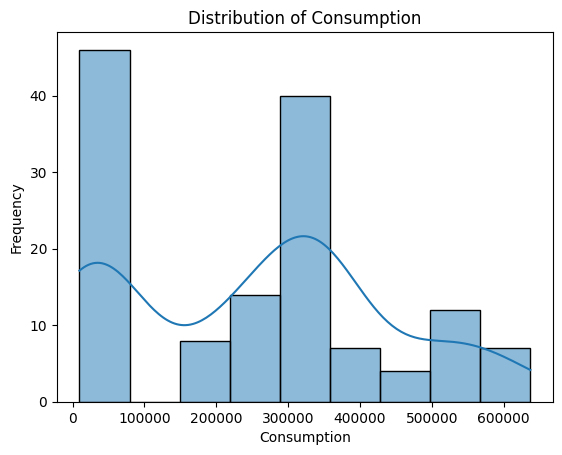

In [11]:
print("Distribution plot for consumption")
sns.histplot(data['consumption'], kde=True)
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

Bivariate Analysis


Text(0, 0.5, 'Consumption')

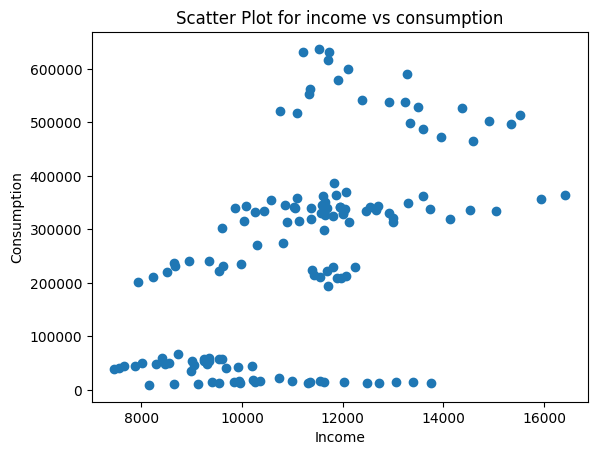

In [12]:
print("Bivariate Analysis")
plt.scatter(data["income"],data["consumption"])
plt.title("Scatter Plot for income vs consumption")
plt.xlabel("Income")
plt.ylabel("Consumption")

Boxplot between State and Income


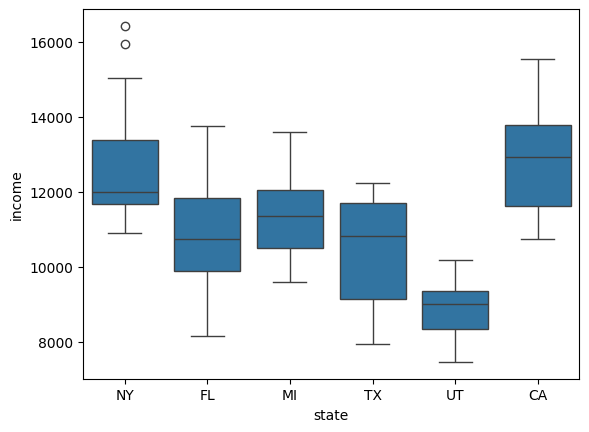

In [13]:
print("Boxplot between State and Income")
sns.boxplot(x="state",y="income",data=data)
plt.show()

Pairplot of regression among Consumption, Income and Heating Levels


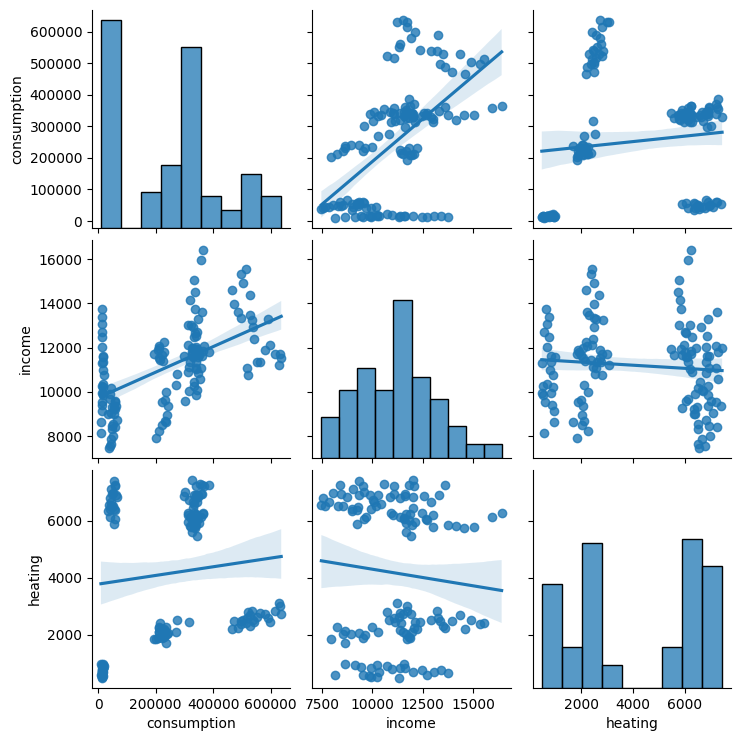

In [14]:
#Multivariate Analysis
print("Pairplot of regression among Consumption, Income and Heating Levels")
sns.pairplot(data,vars = ['consumption', 'income','heating'], kind="reg")
plt.show()

Finding correlation coefficient between all the numeric codes to find what factor affects what


<Axes: >

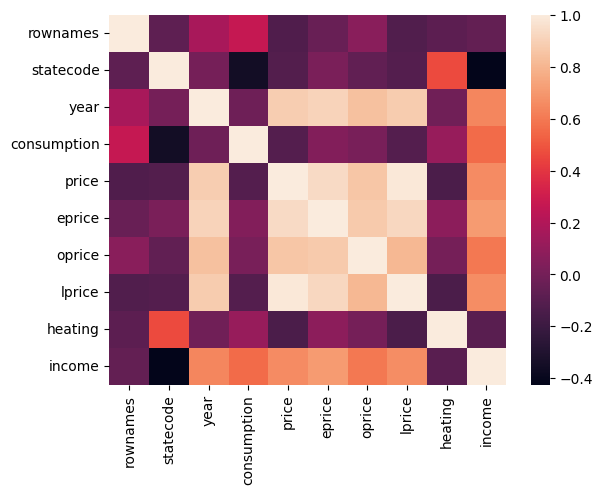

In [15]:
print("Finding correlation coefficient between all the numeric codes to find what factor affects what")
correlation = data.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

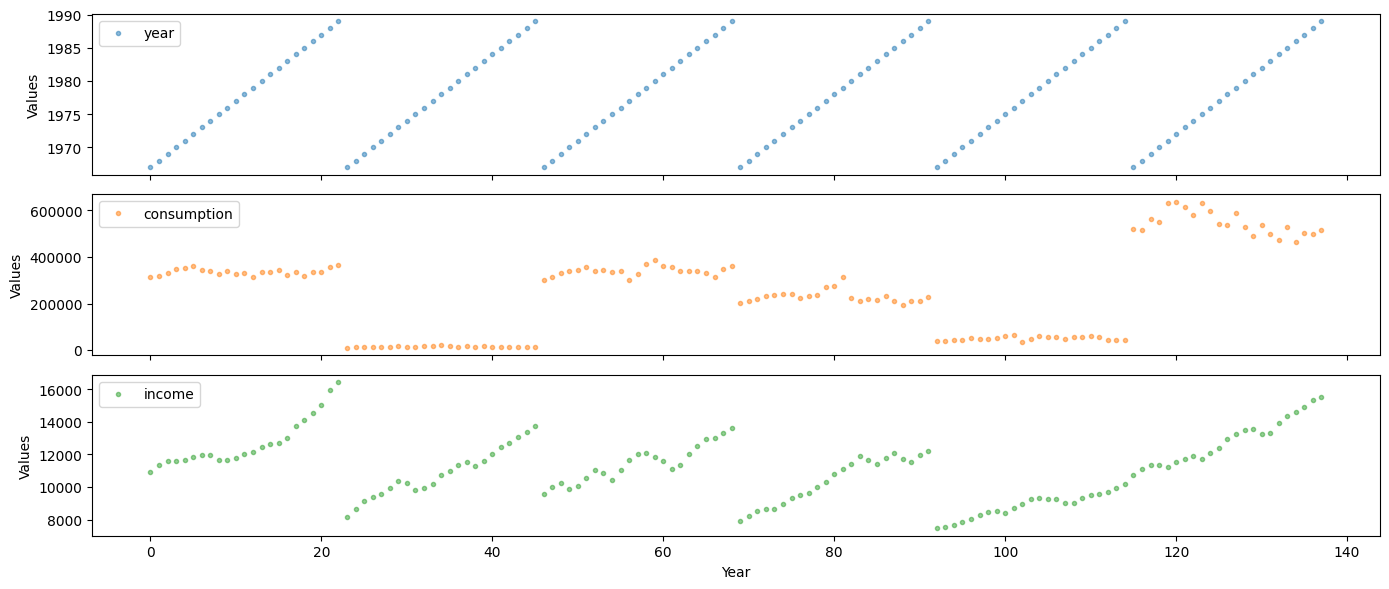

In [16]:
#Time-Series Analysis
import matplotlib.pyplot as plt
import seaborn as sns
cols_to_plot = ['year','consumption','income']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)
for ax in axes:
    ax.set_title(ax.get_ylabel())
    ax.set_xlabel('Year')
    ax.set_ylabel('Values')
plt.tight_layout()
plt.show()

The top graph shows a linear trend of the years from 1967 to 1989. This is expected as the data points are sequential years.

The middle graph shows the consumption values over the years. The data points are scattered, indicating some variability in consumption each year. However, there is a general upward trend, suggesting that consumption has been increasing over the years. Despite some fluctuations, the overall trend in consumption is upward, indicating a growing demand or usage over the years.

The bottom graph shows the income values over the years. This graph exhibits a clear upward trend, indicating that income has been steadily increasing from 1967 to 1989. The steady increase in income suggests economic growth or improved financial conditions during this period, potentially leading to increased consumption.

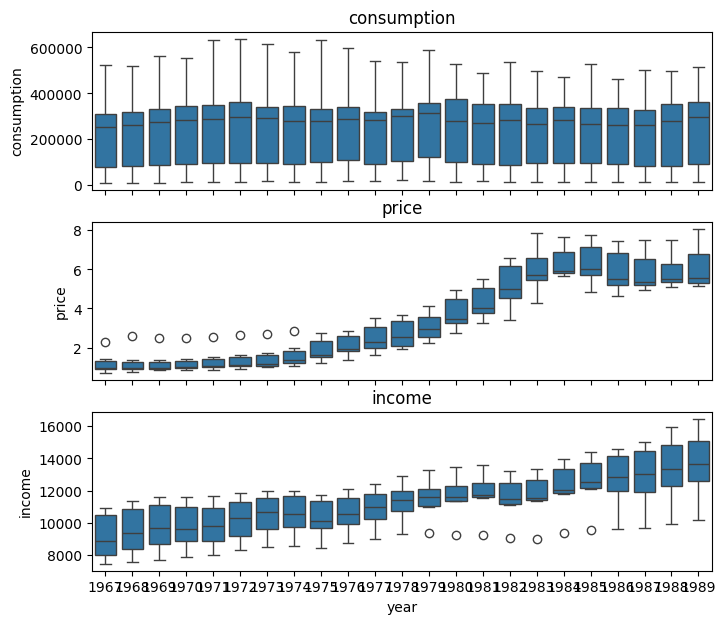

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['consumption', 'price', 'income'], axes):
  sns.boxplot(data=data, x='year', y=name, ax=ax)
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')

The graphs show that with a steady rise in yearly income, the price has also increased and been adjusted accordingly depending on the state of the economy at the time.

In [18]:
from scipy.stats import skew,kurtosis
print("1D Statistical Analysis on the Price Column")
price = data['price']
skewness = skew(price)
print("Skewness: ",skewness)
kurt = kurtosis(price)
print("Kurtosis: ",kurt)

1D Statistical Analysis on the Price Column
Skewness:  0.45076539036611163
Kurtosis:  -1.0895285730517155


In [19]:
bins = [0, 3, 6, 9]
labels = ['low', 'medium', 'high']
data['price_category'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)
frequency_distributions = data['price_category'].value_counts().sort_index()
print("\nFrequency Distribution:\n", frequency_distributions)


Frequency Distribution:
 price_category
low       72
medium    49
high      17
Name: count, dtype: int64


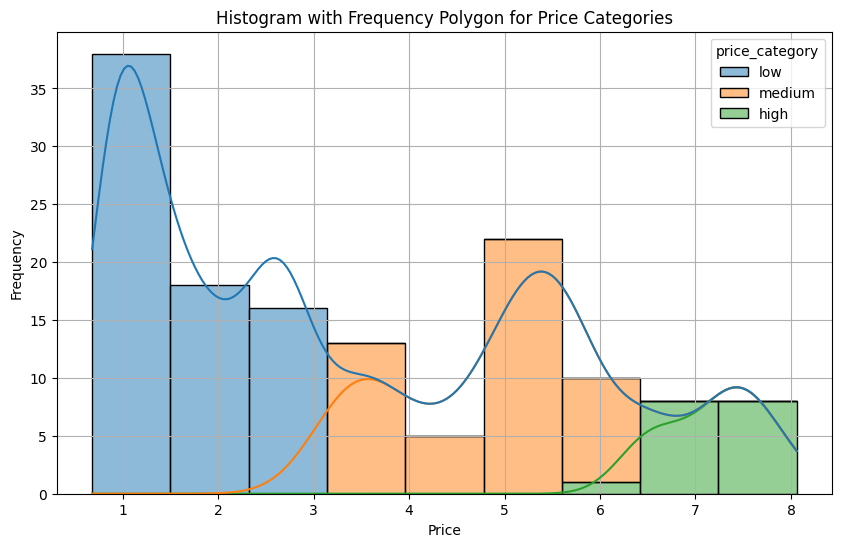

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='price', hue='price_category', kde=True, multiple='stack')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram with Frequency Polygon for Price Categories')
plt.grid(True)
plt.show()

In [21]:
relative_frequency_distributions = data['price_category'].value_counts(normalize=True).sort_index()
print("\nRelative Frequency Distribution:\n", relative_frequency_distributions)


Relative Frequency Distribution:
 price_category
low       0.521739
medium    0.355072
high      0.123188
Name: proportion, dtype: float64


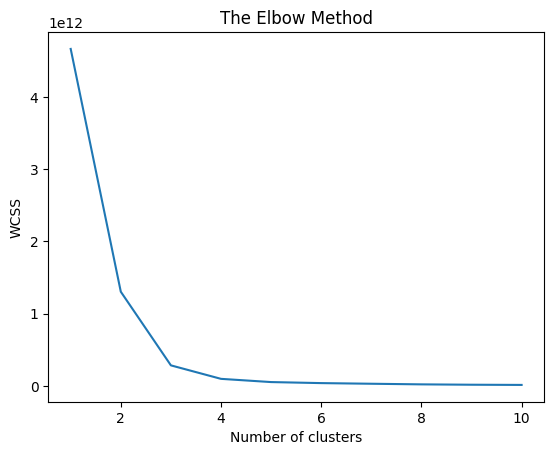

In [26]:
X = data[['consumption','income']].values
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

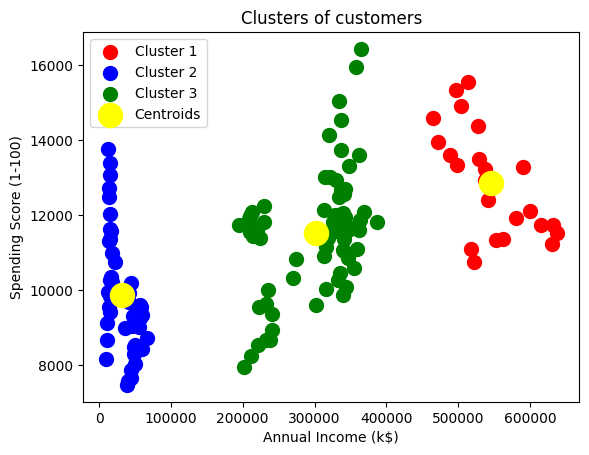

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()